In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('geelongbuiltenv with Geographic location.csv')
dataset.head()
print("Number of rows in the datset : {}".format(dataset.shape[0]))
print("Number of columns in the datset : {}".format(dataset.shape[1]))


Number of rows in the datset : 46
Number of columns in the datset : 41


0    38
1     8
Name: TrainPres, dtype: int64


(46, 41)

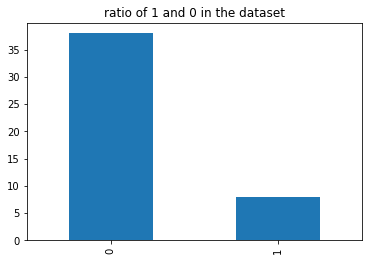

In [3]:
dataset['TrainPres'].value_counts().plot(kind='bar',title="ratio of 1 and 0 in the dataset")
y = dataset['TrainPres'].value_counts()
print (y)
dataset.shape

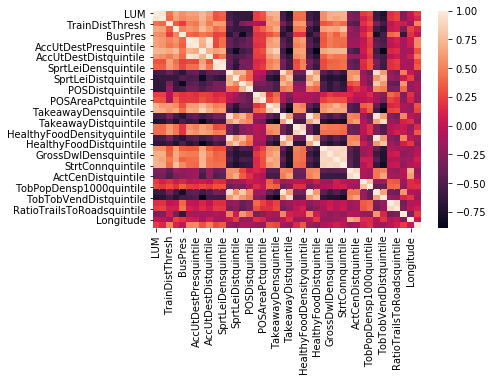

In [4]:
corr = dataset.corr()
sns.heatmap(corr)

In [5]:
corelation = 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= corelation:
            if columns[j]:
                columns[j] = False

selected_columns = dataset.iloc[:,1:].columns[columns]

In [6]:
selected_columns

Index(['LUM', 'TrainDistThresh', 'BusDistThresh', 'BusPres', 'AccUtDestPres',
       'AccUtDestDist', 'SprtLeiDens', 'SprtLeiDist', 'SprtLeiDistquintile',
       'POSDist', 'POSDistquintile', 'POSAreaPct', 'POSAreaPctquintile',
       'TakeawayDens', 'TakeawayDensquintile', 'TakeawayDistquintile',
       'HealthyFoodDensity', 'HealthyFoodDensityquintile',
       'HealthyFoodDistquintile', 'GrossDwlDens', 'ActCenDist',
       'TobPopDensp1000', 'TobPopDensp1000quintile', 'RatioTrailsToRoads',
       'Latitude', 'Longitude', 'TrainPres'],
      dtype='object')

In [7]:
filtered_column_data = dataset[selected_columns]
filtered_column_data = filtered_column_data.drop(['Latitude','Longitude'], axis=1)# Dropped latitude and longitude as well
filtered_column_data.shape

(46, 25)

In [8]:
test_data = dataset.query("Suburb == '18Waurn Ponds'")
dataset.drop(dataset.index[8], inplace=True)

test_data = test_data[['LUM', 'TrainDistThresh', 'BusDistThresh', 'BusPres', 'AccUtDestPres',
       'AccUtDestDist', 'SprtLeiDens', 'SprtLeiDist', 'SprtLeiDistquintile',
       'POSDist', 'POSDistquintile', 'POSAreaPct', 'POSAreaPctquintile',
       'TakeawayDens', 'TakeawayDensquintile', 'TakeawayDistquintile',
       'HealthyFoodDensity', 'HealthyFoodDensityquintile',
       'HealthyFoodDistquintile', 'GrossDwlDens', 'ActCenDist',
       'TobPopDensp1000', 'TobPopDensp1000quintile', 'RatioTrailsToRoads',
       'TrainPres']]

print("Number of rows in the test_datset : {}".format(test_data.shape))

x_test_data = test_data.iloc[:,:-1]
y_test_data = test_data.iloc[:,-1]

print(x_test_data.shape)
print(y_test_data.shape)

Number of rows in the test_datset : (1, 25)
(1, 24)
(1,)


In [9]:
no_train_data = filtered_column_data.query("TrainPres == 0")
no_train_data
train_data = filtered_column_data.query("TrainPres == 1")
train_data

print(no_train_data.shape)
print(train_data.shape)

(38, 25)
(8, 25)


In [10]:
print("There are {} no train data".format(len(no_train_data)))
print("There are {} train data".format(len(train_data)))

There are 38 no train data
There are 8 train data


In [11]:
x = filtered_column_data.iloc[:,:-1]
y = filtered_column_data.iloc[:,-1].to_frame()

oversample = RandomOverSampler(sampling_strategy='minority')
x_new, y_new = oversample.fit_resample(x, y)

data_frame_new = pd.concat([x_new,y_new])


In [12]:
no_train_data = data_frame_new.query("TrainPres == 0")
no_train_data
train_data = data_frame_new.query("TrainPres == 1")
train_data

print(no_train_data.shape)
print(train_data.shape)

(38, 25)
(38, 25)


1.0    38
0.0    38
Name: TrainPres, dtype: int64


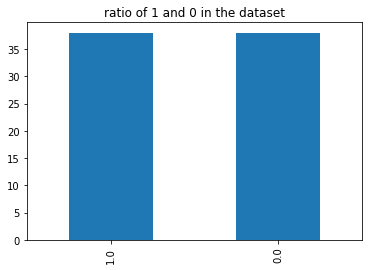

In [13]:
data_frame_new['TrainPres'].value_counts().plot(kind='bar',title="ratio of 1 and 0 in the dataset")
y = data_frame_new['TrainPres'].value_counts()
print (y)

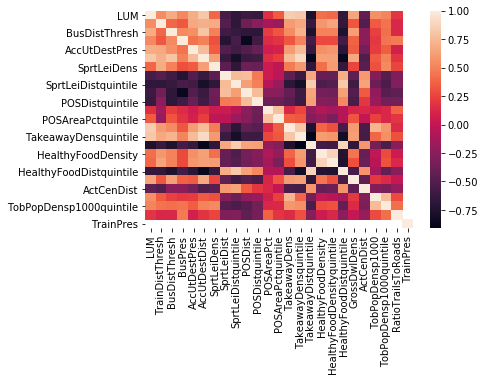

In [14]:
corr = data_frame_new.corr()
sns.heatmap(corr)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

In [16]:
print("Shape of total data {}".format(data_frame_new.shape))
print("Shape of X trianing data {}".format(x_train.shape))
print("Shape of Y trianing data {}".format(y_train.shape))
print("Shape of X testing data {}".format(x_test.shape))
print("Shape of Y testing data {}".format(y_test.shape))



Shape of total data (152, 25)
Shape of X trianing data (60, 24)
Shape of Y trianing data (60, 1)
Shape of X testing data (16, 24)
Shape of Y testing data (16, 1)


In [17]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 

# Fit an SVM using linear kernel
svm_model = svm.SVC()
svm_model.fit(x_train, y_train.values.ravel())

#Training/Testing Accuracy:
predictions = svm_model.predict(x_test) 
print(classification_report(y_test, predictions)) 





              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.70      0.78      0.74         9

    accuracy                           0.69        16
   macro avg       0.68      0.67      0.68        16
weighted avg       0.69      0.69      0.68        16



In [18]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf', 'poly']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train.values.ravel()) 


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=  10.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.917, total=  33.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.6s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.750, total=  14.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=  36.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.833, total=  12.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed: 91.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [19]:

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [20]:

grid_predictions = grid.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [21]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(grid) 
  
# Load the pickled model 
svm_from_pickle = pickle.loads(saved_model) 

In [23]:
svm_from_pickle

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
svm_from_pickle.predict(x_test_data)
print(y_test_data)